For the first part of the task, I performed a linear regression of the evolution of the maximum battery capacity of my laptop. In addition, I wanted to determine the formula of the linear regression to be able to predict the future development as well.

In [17]:
import numpy
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_csv('coconutbattery-macbook-battery-capacity.csv', sep=';')
df.head()

,Day,Maximum Capacity
0,0,6086
1,2,6003
2,6,5998
3,13,5984
4,26,5973


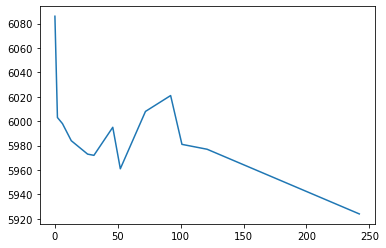

In [19]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
plot.plot(x,y)
plot.show()

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/7, random_state = 0)
print(xTrain)
print(yTrain)

[[ 26]
 [101]
 [  6]
 [ 72]
 [  2]
 [ 52]
 [ 92]
 [ 13]
 [  0]
 [ 31]
 [242]]
[5973 5981 5998 6008 6003 5961 6021 5984 6086 5972 5924]


In [21]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
print(linearRegressor)
yPrediction = linearRegressor.predict(xTest)
print(yPrediction)

LinearRegression()
[5995.82395829 5971.16925915]


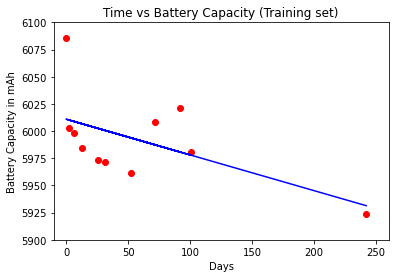

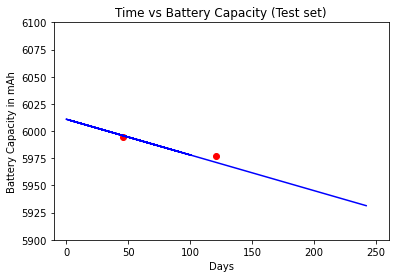

In [22]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Time vs Battery Capacity (Training set)')
plot.xlabel('Days')
plot.ylabel('Battery Capacity in mAh')
plot.axis([-10, 260, 5900, 6100])
plot.show()
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Time vs Battery Capacity (Test set)')
plot.xlabel('Days')
plot.ylabel('Battery Capacity in mAh')
plot.axis([-10, 260, 5900, 6100])
plot.show()

In [23]:
print("y = ", linearRegressor.coef_, " * x + ", linearRegressor.intercept_) # formula of the linear regression
print(linearRegressor.coef_ * 730 + linearRegressor.intercept_) # predicted battery capacity after two years

y =  [-0.32872932]  * x +  6010.945507094825
[5770.97310212]


In [24]:
linearRegressor.predict([[730]]) # validate the formula with 'predict'

array([5770.97310212])